### IMPORTS

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.feature_selection import RFE

### LOADING DATA

In [3]:
DATA = pd.read_csv('churn_prediction.csv')

In [4]:
DATA.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


### MISSING VALUES

In [5]:
DATA.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

#### GENDER

In [6]:
DATA['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

##### Fill missing value with -1 in gender

In [7]:
DATA['gender'].fillna(-1, inplace = True)

In [8]:
DATA['gender'].value_counts()

Male      16548
Female    11309
-1          525
Name: gender, dtype: int64

#### DEPENDENTS

In [9]:
DATA['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

##### Fill missing value with mode in dependents

In [10]:
DATA['dependents'].fillna(DATA['dependents'].mode()[0], inplace = True)

In [11]:
DATA['dependents'].value_counts()

0.0     23898
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

#### OCCUPATION

In [12]:
DATA['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

##### Fill missing value with mode in occupation

In [13]:
DATA['occupation'].fillna(DATA['occupation'].mode()[0], inplace = True)

In [14]:
DATA['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

#### CITY

In [15]:
DATA['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

##### Fill missing value with mode in city

In [16]:
DATA['city'].fillna(DATA['city'].mode()[0], inplace = True)

In [17]:
DATA['city'].value_counts()

1020.0    4282
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64

#### DAYS SINCE LAST TRANSACTION

In [18]:
DATA['days_since_last_transaction'].value_counts()

0.0      1672
3.0       831
14.0      654
4.0       632
6.0       596
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 360, dtype: int64

##### Fill missing values with a high number like 999

In [19]:
DATA['days_since_last_transaction'].fillna(999, inplace = True)

In [20]:
DATA['days_since_last_transaction'].value_counts()

999.0    3223
0.0      1672
3.0       831
14.0      654
4.0       632
         ... 
170.0       1
218.0       1
334.0       1
288.0       1
321.0       1
Name: days_since_last_transaction, Length: 361, dtype: int64

In [21]:
DATA.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,999.0,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,-1,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


### ONE HOT ENCODING

#### GENDER

In [22]:
DATA['gender'].value_counts()

Male      16548
Female    11309
-1          525
Name: gender, dtype: int64

In [23]:
DATA = pd.concat([pd.get_dummies(DATA['gender'], prefix = 'gender'), DATA], axis = 1)

In [24]:
DATA = DATA.drop(['gender'], axis = 1)

#### OCCUPATION

In [25]:
DATA['occupation'].value_counts()

self_employed    17556
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [26]:
DATA = pd.concat([pd.get_dummies(DATA['occupation'], prefix = 'occupation'), DATA], axis = 1)

In [27]:
DATA = DATA.drop(['occupation'], axis = 1)

In [28]:
DATA.head()

,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,gender_-1,gender_Female,gender_Male,customer_id,vintage,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,0,0,0,1,0,0,0,1,1,3135,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,0,0,0,1,0,0,0,1,2,310,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,0,0,1,0,0,0,0,1,4,2356,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,0,0,0,1,0,1,0,0,5,478,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,0,0,0,1,0,0,0,1,6,2531,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


### SCALING DATA

In [29]:
TEMP = DATA.copy()
#num_cols = ['customer_nw_category', 'current_balance',
#            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
#            'current_month_credit','previous_month_credit', 'current_month_debit', 
#            'previous_month_debit','current_month_balance', 'previous_month_balance']
num_cols = ['vintage', 'age', 'dependents', 'city', 'branch_code', 'days_since_last_transaction', 'customer_nw_category', 
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance']
for i in num_cols:
    TEMP[i] = np.log(TEMP[i] + 17000)
TEMP = StandardScaler().fit_transform(TEMP[num_cols])
TEMP = pd.DataFrame(TEMP, columns = num_cols)

In [30]:
DATA_COPY = DATA.copy()
DATA_COPY = DATA_COPY.drop(columns = num_cols, axis = 1)
DATA_COPY = DATA_COPY.merge(TEMP, left_index = True, right_index = True, how = "left")

### TRAIN / TEST SPLIT

In [31]:
X = DATA_COPY.drop(['churn', 'customer_id'], axis = 1)
y = DATA_COPY['churn']

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=11)

### MODEL

In [33]:
model = LogisticRegression(max_iter = 10000)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

<AxesSubplot:>

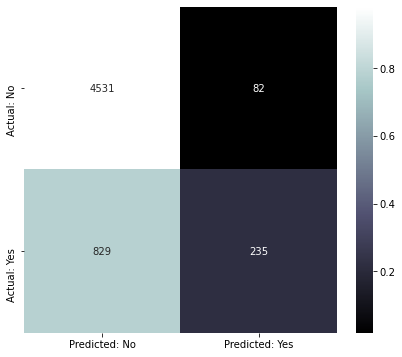

In [34]:
pred_val = model.predict(xtest)
cm = confusion_matrix(ytest,pred_val)

plt.figure(figsize=[7, 6])
norm_cm = cm
norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap='bone')

In [35]:
recall_score(ytest,pred_val)

0.22086466165413535

In [36]:
accuracy_score(ytest,pred_val)

0.8395279196758851

In [37]:
precision_score(ytest,pred_val)

0.7413249211356467

### STRATIFIED K FOLD

In [38]:
def cv_score(cols = X.columns):
    i = 1    
    kf = StratifiedKFold(n_splits = 5, random_state = 12, shuffle = True)

    for df_index,test_index in kf.split(X[cols], y):
        
        xtr,xvl = X[cols].loc[df_index], X[cols].loc[test_index]
        ytr,yvl = y.loc[df_index], y.loc[test_index]

        model = LogisticRegression(max_iter = 10000)
        model.fit(xtr, ytr)
        pred_probs = model.predict_proba(xvl)
        pp = []

        for j in pred_probs[:,1]:
            if j>0.5:
                pp.append(1)
            else:
                pp.append(0)

        pred_val = pp
        recall = recall_score(yvl,pred_val)
        precision = precision_score(yvl,pred_val)
        acc = accuracy_score(yvl,pred_val)
        print("{} of kfold {} Accuracy Score: {:.4f}, Recall Score: {:.4f}, Precision Score: {:.4f} ".format(i,kf.n_splits,acc,recall,precision))

        i+=1

In [39]:
cv_score()

1 of kfold 5 Accuracy Score: 0.8438, Recall Score: 0.2452, Precision Score: 0.7350 
2 of kfold 5 Accuracy Score: 0.8429, Recall Score: 0.2291, Precision Score: 0.7484 
3 of kfold 5 Accuracy Score: 0.8434, Recall Score: 0.2462, Precision Score: 0.7296 
4 of kfold 5 Accuracy Score: 0.8432, Recall Score: 0.2386, Precision Score: 0.7382 
5 of kfold 5 Accuracy Score: 0.8340, Recall Score: 0.2006, Precision Score: 0.6763 


### REVERSE FEATURE ELIMINATION

In [40]:
rfe = RFE(estimator = LogisticRegression(max_iter = 10000), n_features_to_select=1, step=1)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=1)

In [41]:
ranking_df = pd.DataFrame()
ranking_df['Feature_name'] = X.columns
ranking_df['Rank'] = rfe.ranking_

In [42]:
ranked = ranking_df.sort_values(by=['Rank'])

In [43]:
ranked

,Feature_name,Rank
15,current_balance,1
18,average_monthly_balance_prevQ,2
0,occupation_company,3
17,average_monthly_balance_prevQ2,4
23,current_month_balance,5
24,previous_month_balance,6
13,days_since_last_transaction,7
21,current_month_debit,8
8,vintage,9
3,occupation_self_employed,10


In [46]:
cv_score(cols = ranked['Feature_name'][:15].values)

1 of kfold 5 Accuracy Score: 0.8432, Recall Score: 0.2414, Precision Score: 0.7341 
2 of kfold 5 Accuracy Score: 0.8425, Recall Score: 0.2262, Precision Score: 0.7484 
3 of kfold 5 Accuracy Score: 0.8428, Recall Score: 0.2462, Precision Score: 0.7235 
4 of kfold 5 Accuracy Score: 0.8437, Recall Score: 0.2386, Precision Score: 0.7448 
5 of kfold 5 Accuracy Score: 0.8333, Recall Score: 0.1996, Precision Score: 0.6688 
